<a href="https://colab.research.google.com/github/ProboKrishnacahya/Machine_Learning/blob/main/Week4_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0706012010039 - Probo Krishnacahya
**IMT01306601-A Machine Learning**

Assignment 3: KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1

Gunakan dataset iris pada link berikut https://raw.githubusercontent.com/elflin/datasets/main/Iris.csv
untuk melakukan klasifikasi menggunakna K-NN

## Load Dataset

In [2]:
# Load data dari link github berikut
url = "https://raw.githubusercontent.com/elflin/datasets/main/Iris.csv"
data = pd.read_csv(url)

# Munculkan head() dari data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Munculkan informasi dari column pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Munculkan deskripsi dari masing-masing column pada data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Munculkan nama class
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

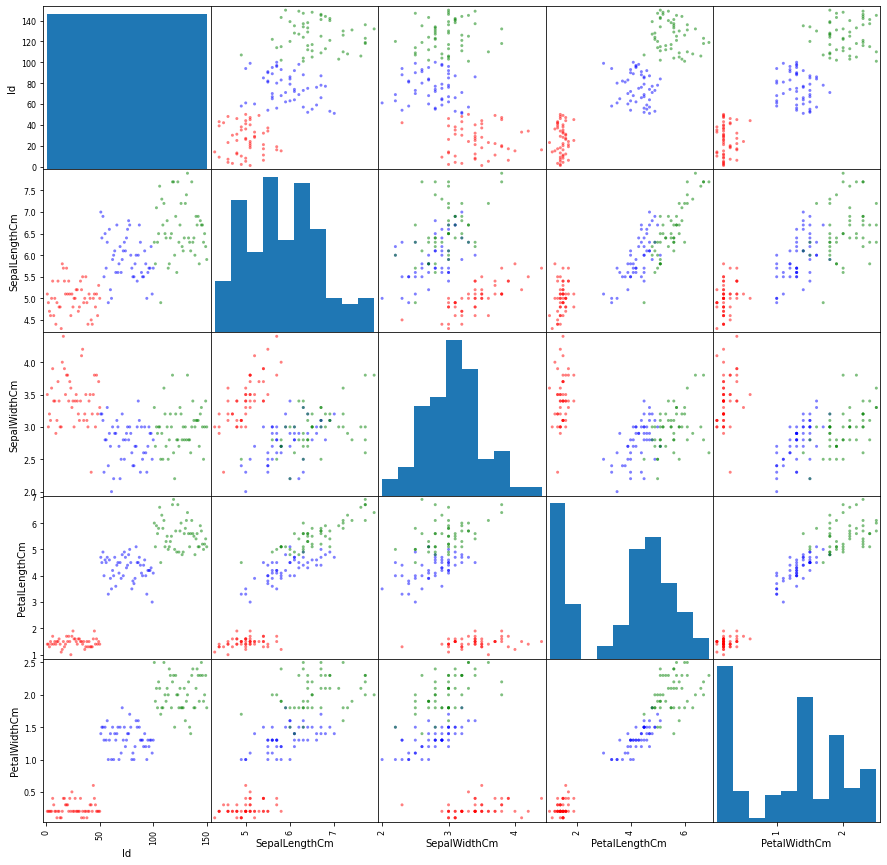

In [6]:
# visualisasi data berdasarkan class target
list = ['red' if i=='Iris-setosa' else 
        'blue' if i=='Iris-versicolor' else 
        'green' 
        for i in data.loc[:,'Species']]

pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Species'], c=list, figsize=[15,15], diagonal='hist');

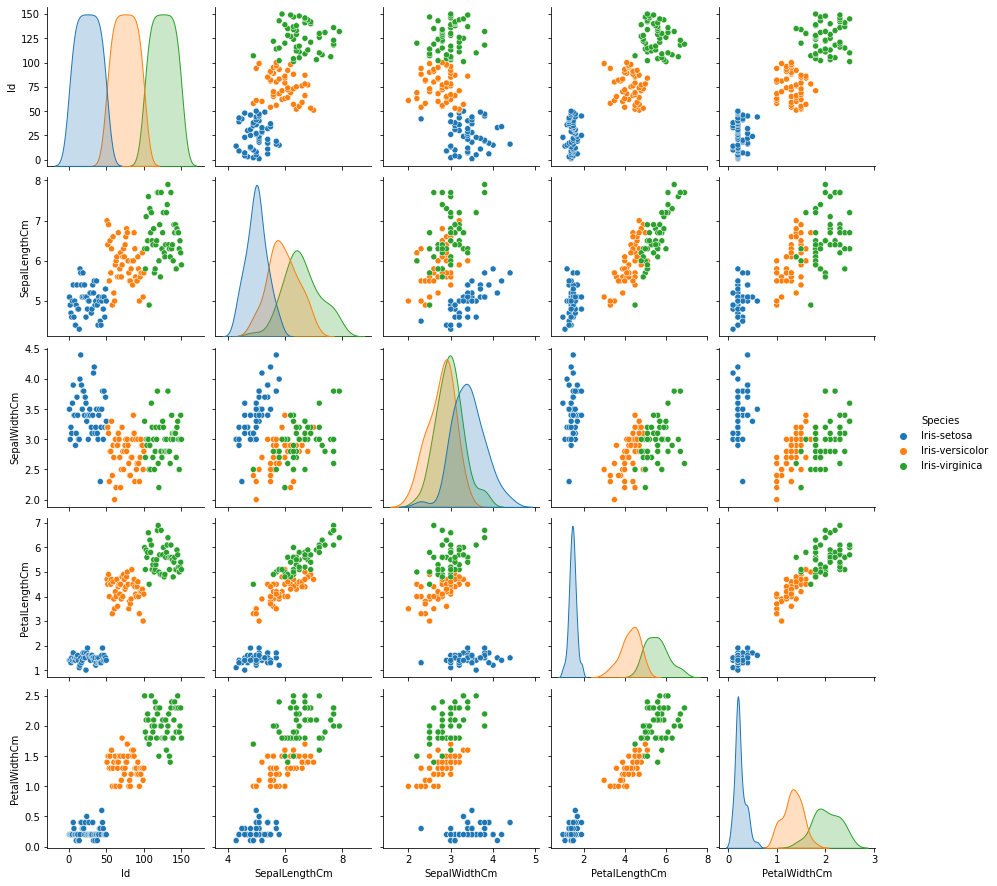

In [7]:
# Alternatif: Seaborn pairplot
sns.pairplot(data=data, hue='Species');
plt.show()

## Pre-processing Data

In [8]:
# Pisahkan dataset menjadi x dan y menggunakan loc
X, y = data.loc[:,data.columns != 'Species'], data.loc[:,'Species']

In [9]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head

<bound method NDFrame.head of             0         1         2         3         4
0    0.000000  0.222222  0.625000  0.067797  0.041667
1    0.006711  0.166667  0.416667  0.067797  0.041667
2    0.013423  0.111111  0.500000  0.050847  0.041667
3    0.020134  0.083333  0.458333  0.084746  0.041667
4    0.026846  0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...       ...
145  0.973154  0.666667  0.416667  0.711864  0.916667
146  0.979866  0.555556  0.208333  0.677966  0.750000
147  0.986577  0.611111  0.416667  0.711864  0.791667
148  0.993289  0.527778  0.583333  0.745763  0.916667
149  1.000000  0.444444  0.416667  0.694915  0.708333

[150 rows x 5 columns]>

In [10]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 32)

## Learning Process

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Buat model menggunakan KNeighborsClassifier dengan K = 4
knn = KNeighborsClassifier(n_neighbors=4)

# Lakukan training dengan dataset train
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [12]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
prediction = knn.predict(X_test)
print('Prediction: {}'.format(prediction))

Prediction: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa']


In [13]:
# Print akurasi dari data testing menggunakan score
print('KNN (K=4) accuracy is: ', knn.score(X_test, y_test)) # accuracy

KNN (K=4) accuracy is:  1.0


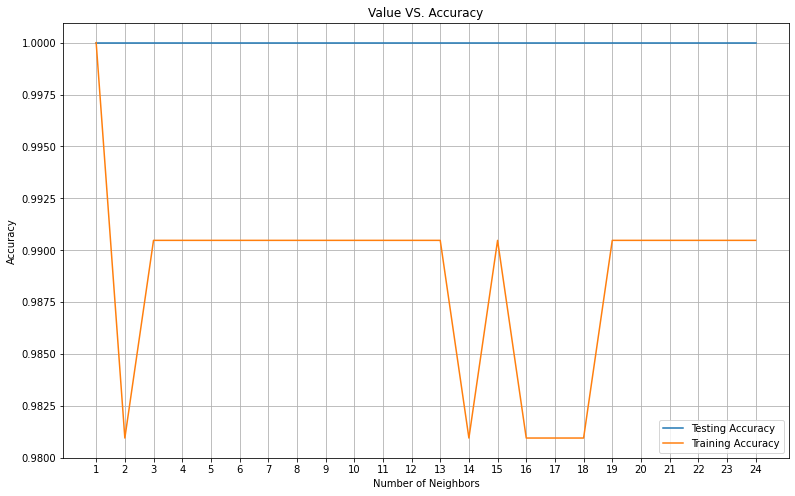

Best Accuracy is 1.0 with K = 1


In [14]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))
    
    #Compute accuracy on the testing set
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [15]:
# Pilih K terbaik dari data percobaan di atas
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

In [16]:
# Print akurasi dari data testing menggunakan score
print('KNN (K=15) accuracy is: ', knn.score(X_test, y_test)) # accuracy

KNN (K=15) accuracy is:  1.0


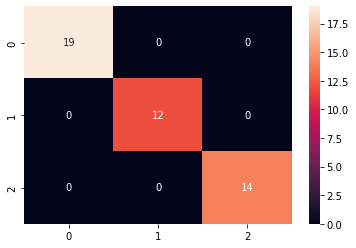

In [17]:
# buat visualisasi untuk confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(cf_matrix, annot=True)

# Exercise 2

Gunakan dataset iris pada link berikut https://raw.githubusercontent.com/elflin/datasets/main/orthopedic_3class.csv
untuk melakukan klasifikasi menggunakna K-NN

## Load Data

In [49]:
# Load data dari link github berikut
url = "https://raw.githubusercontent.com/elflin/datasets/main/orthopedic_3class.csv"
df = pd.read_csv(url)

# Munculkan head() dari data
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [50]:
# Munculkan informasi dari column pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class_status              310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [51]:
# Munculkan deskripsi dari masing-masing column pada data
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [53]:
df.class_status.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [54]:
#tunjukkan class target
list = ['red' if i=='Hernia' else 'blue' if i=='Spondylolisthesis' else 'green' 
        for i in df.loc[:,'class_status']]

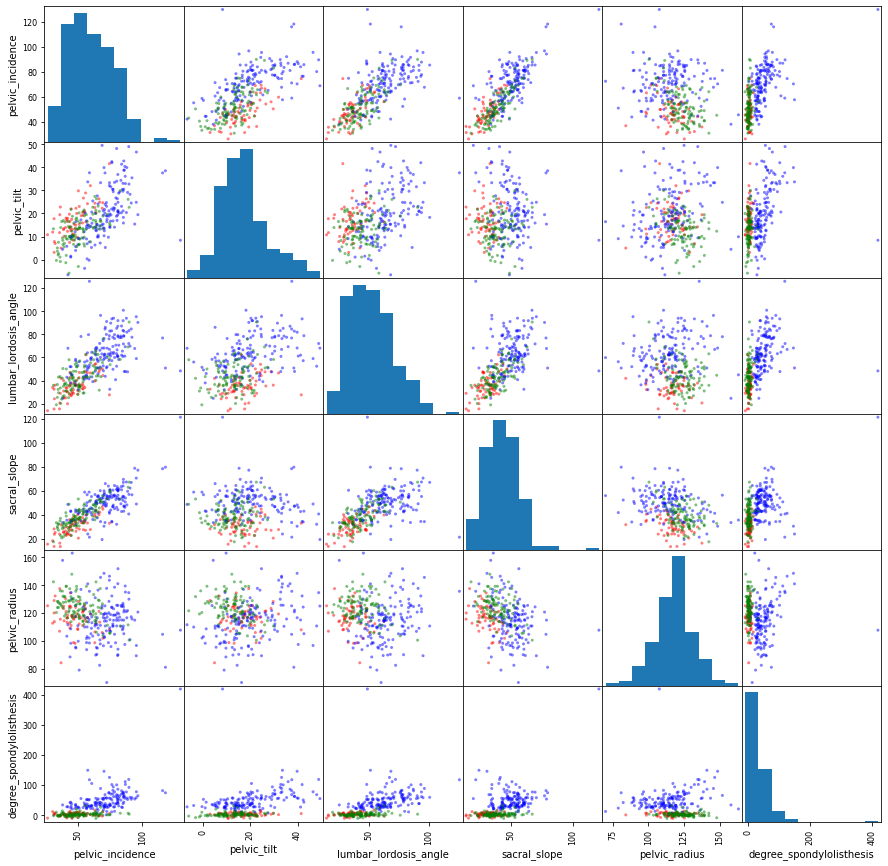

In [55]:
# visualisasi histogram dan scater plot
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class_status'], c=list, figsize=[15,15], diagonal='hist');

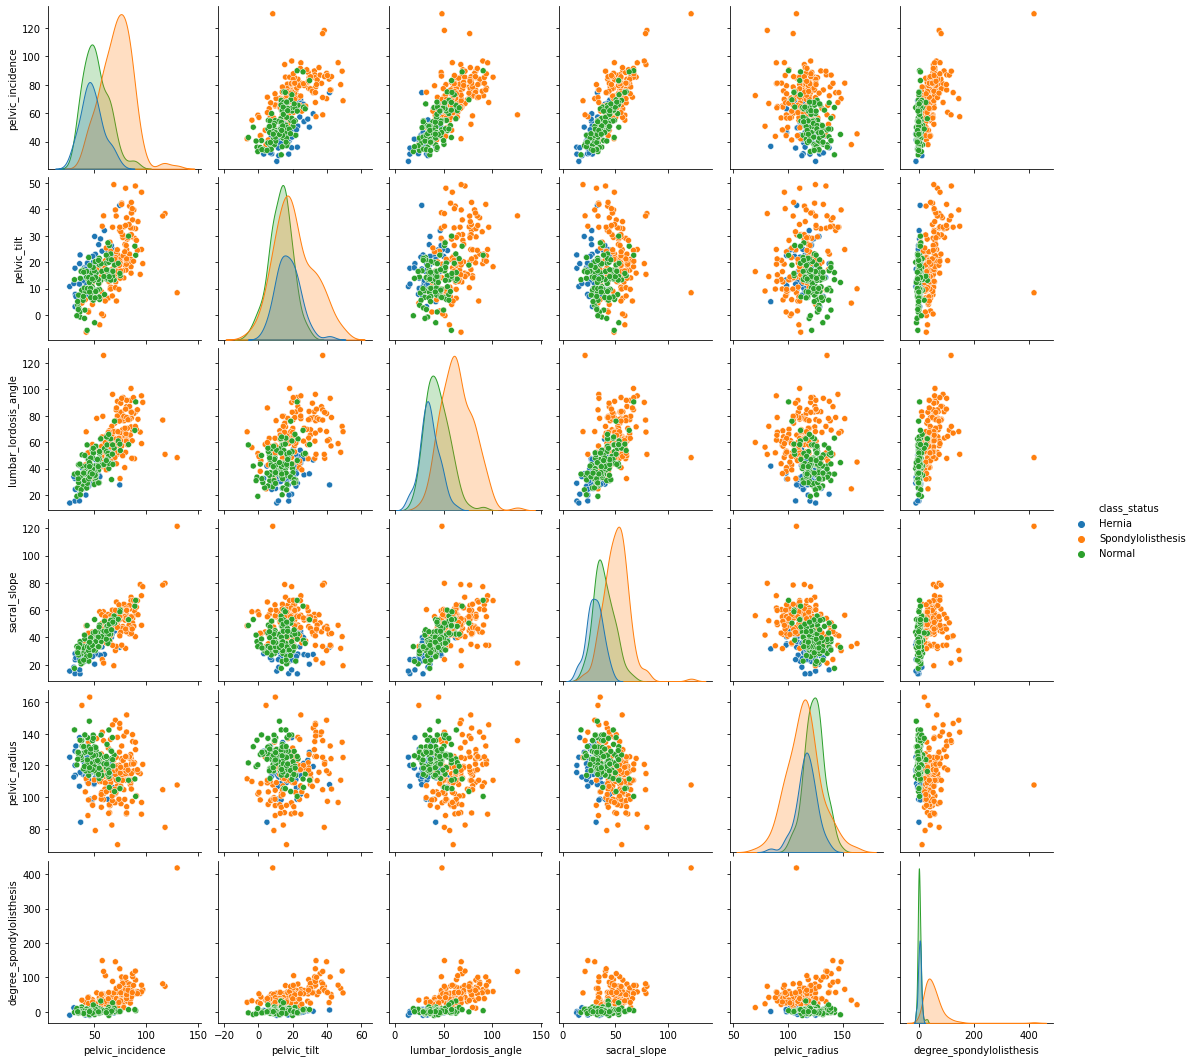

In [56]:
# Alternatif: Seaborn Pairplot
sns.pairplot(data=df, hue='class_status');
plt.show()

# Pre-processing Data

In [57]:
# Pisahkan dataset menjadi x dan y menggunakan loc
X, y = df.loc[:, df.columns != 'class_status'], df.loc[:, 'class_status']

In [58]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [59]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=32)

## Learning Process

In [60]:
from sklearn.neighbors import KNeighborsClassifier
# Buat model menggunakan KNeighborsClassifier dengan K = 4

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [61]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
pred = knn.predict(X_test)
print('Prediction',format(pred))

Prediction ['Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia'
 'Normal' 'Normal' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Hernia' 'Hernia' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Hernia' 'Normal' 'Normal' 'Normal'
 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Hernia' 'Hernia'
 'Normal' 'Normal' 'Spondylolisthesis' 'Hernia' 'Hernia'
 'Spondylolisthesis' 'Normal' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Normal' 'Spondylolisthesis' 'Normal'
 'Normal' 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Normal' 'Normal' 'Normal' 'Hernia' 'Hernia' 'Normal' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Hernia' 'Normal' 'Hernia' 'Normal' 'Hernia' 'Normal' 'Normal' 'Normal'
 'Normal' 'Spondylolisthesis' 'Normal' 'Normal' 'Normal' 'Hernia' 'Her

In [62]:
# Print akurasi dari data testing menggunakan score
print('KNN (K=4) accuracy is: ',knn.score(X_test, y_test)) # accuracy

KNN (K=4) accuracy is:  0.7204301075268817


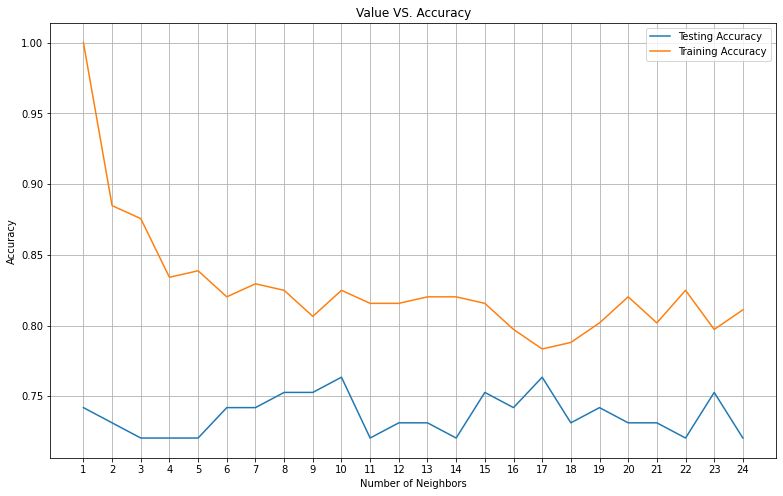

Best Accuracy is 0.7634408602150538 with K = 10


In [63]:
# Finding best model
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))
    
    #Compute accuracy on the testing set
    test_accuracy.append(knn.score(X_test, y_test))

# Buatlah visualisasi dengan Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [64]:
# Pilih K terbaik dari data percobaan di atas
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

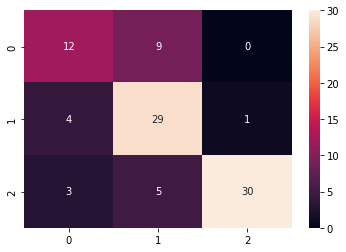

In [65]:
#buatlah visualisasi confunsion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, pred)
sns.heatmap(conf, annot=True)

In [67]:
# Print akurasi dari data testing menggunakan score
print('KNN (K=10) accuracy is: ', knn.score(X_test, y_test)) # accuracy

KNN (K=10) accuracy is:  0.7634408602150538


# Assignment

Gunakan dataset iris pada link berikut https://raw.githubusercontent.com/twiradinata/datasets/main/fish-weight.csv
untuk melakukan klasifikasi menggunakna K-NN

## Load Data

In [69]:
# Load data dari link github berikut
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/fish-weight.csv"
data = pd.read_csv(url)

# Munculkan head() dari data
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [71]:
# Munculkan informasi dari column pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [72]:
# Munculkan deskripsi dari masing-masing column pada data
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [73]:
# tunjukkan class target pada data
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

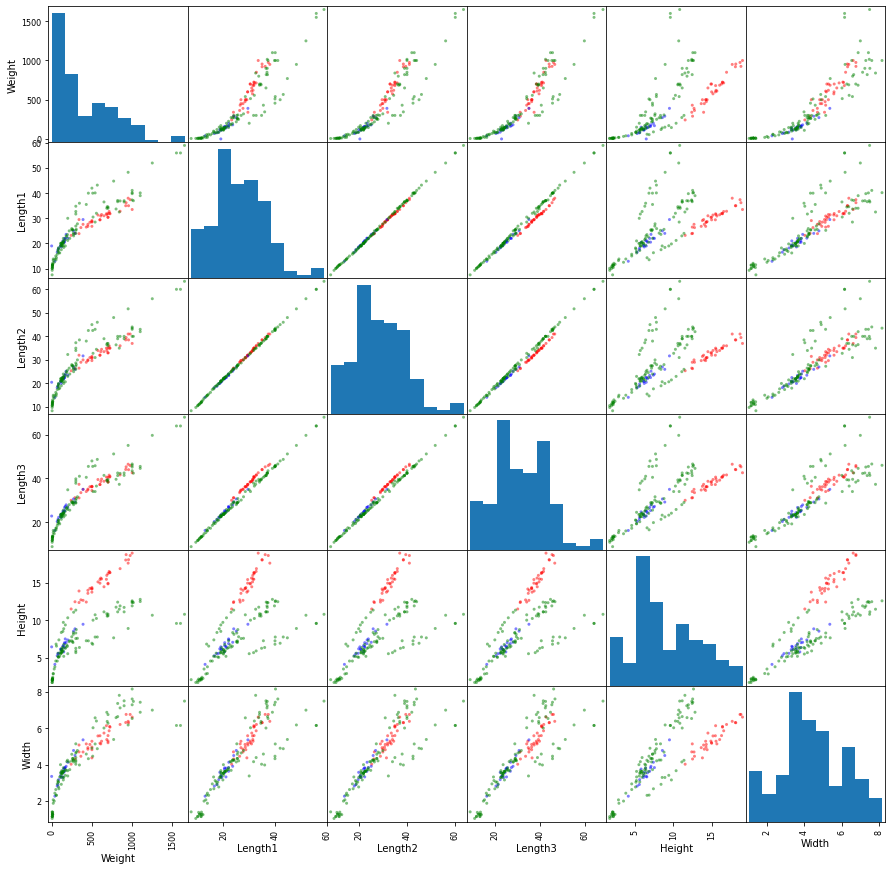

In [74]:
# buatlah visualisasi dengan menggunakan matplotlib
list = ['red' if i=='Bream' else 'blue' if i=='Roach' else 'green'
        for i in data.loc[:,'Species']]

pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Species'], c=list, figsize=[15,15], diagonal='hist');

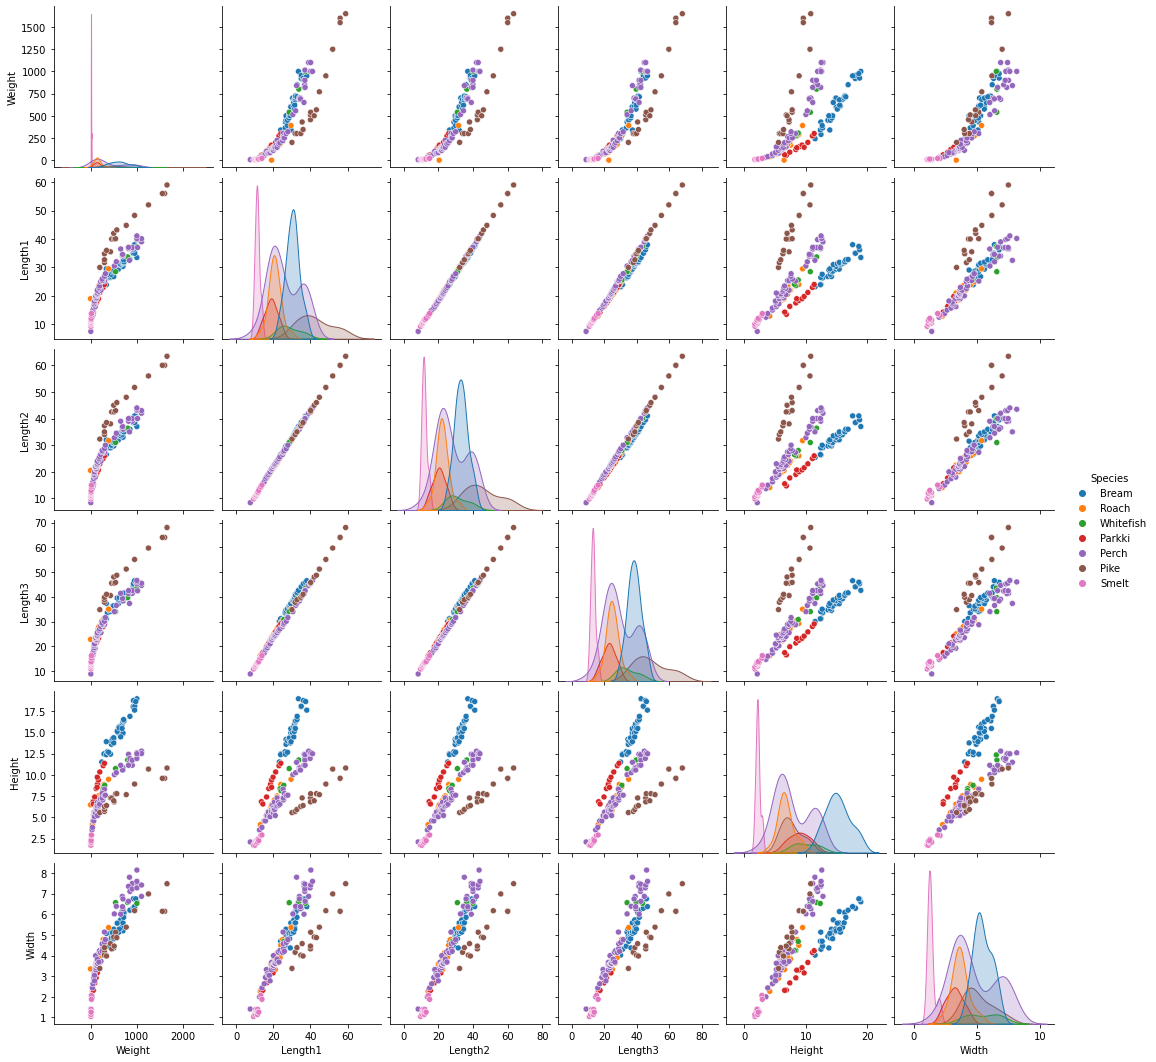

In [75]:
#buatlah alternative visualisasi dengan seaborn
sns.pairplot(data=data, hue='Species');
plt.show()

## Pre-processing Data

In [76]:
# Pisahkan dataset menjadi x dan y menggunakna loc
X, y = data.loc[:, data.columns != 'Species'], data.loc[:, 'Species']

In [77]:
# Normalisasi data dengan minmax scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004


In [78]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=32)

## Learning Process

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# Buat model menggunakan KNeighborsClassifier dengan K = 4
knn = KNeighborsClassifier(n_neighbors=4)

# Lakukan training dengan dataset train
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [80]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
pred = knn.predict(X_test)
print('Prediction',format(pred))

Prediction ['Bream' 'Perch' 'Bream' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Smelt' 'Bream' 'Perch' 'Perch' 'Perch' 'Perch'
 'Bream' 'Smelt' 'Smelt' 'Bream' 'Parkki' 'Smelt' 'Bream' 'Perch' 'Bream'
 'Perch' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Pike' 'Parkki'
 'Perch' 'Perch' 'Perch' 'Smelt' 'Perch' 'Perch' 'Perch' 'Perch' 'Bream'
 'Parkki' 'Perch' 'Perch']


In [82]:
# Print akurasi dari data testing menggunakan score
print('KNN (K=4) accuracy is: ', knn.score(X_test, y_test)) # accuracy

KNN (K=4) accuracy is:  0.7916666666666666


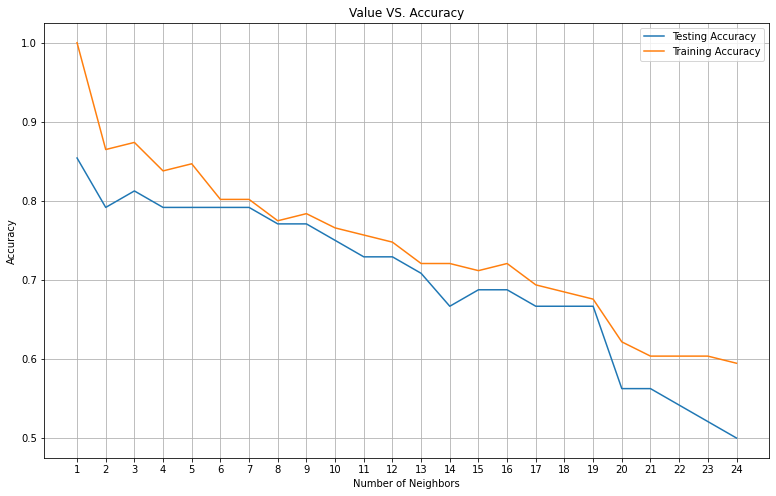

Best Accuracy is 0.8541666666666666 with K = 1


In [83]:
# lakukan analsis untuk menentukan jumlah K yang terbaik
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))
    
    #Compute accuracy on the testing set
    test_accuracy.append(knn.score(X_test, y_test))

# Buatlah visualilsasinya dengan menggunakan plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [84]:
# Pilih K terbaik dari data percobaan di atas
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('KNN (K=1) accuracy is: ',knn.score(X_test, y_test)) # accuracy

KNN (K=1) accuracy is:  0.8541666666666666


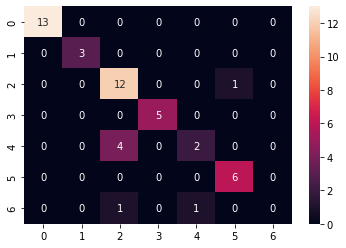

In [85]:
# gambar heat map untuk confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, pred)
sns.heatmap(conf, annot=True)